<a href="https://colab.research.google.com/github/aashutoshkumarbhardwaj/Leetocode-easy-question/blob/main/day36part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('/content/sample_data/titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [11]:
X = df[['Age']]  # Select the 'Age' column as a feature
y = df['Survived']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X = df[['Age', 'Fare']]  # Include 'Fare' column in the features
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1']=x_train['Age'].fillna(-1)

x_train['Fare_999']=x_train['Fare'].fillna(999) # Now 'Fare' column is available in x_train
x_train['Fare_minus1']=x_train['Fare'].fillna(-1)

In [16]:
print('original age variance', x_train['Age'].var())
print('original fare variance', x_train['Fare'].var())
print('imputed age variance', x_train['Age_99'].var())
print('imputed fare variance', x_train['Fare_999'].var())
print('imputed age variance', x_train['Age_minus1'].var())
print('imputed fare variance', x_train['Fare_minus1'].var())

original age variance 210.2517072477438
original fare variance 2761.031434948639
imputed age variance 932.9665366701436
imputed fare variance 47525.47059536007
imputed age variance 315.99550362600644
imputed fare variance 2675.2394049177087


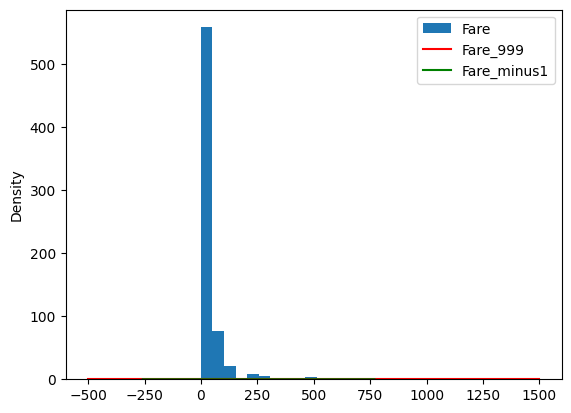

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='hist',ax=ax)
x_train['Fare_999'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')
lines,label=ax.get_legend_handles_labels()
ax.legend(lines,label,loc='best')